---
title: "Exploratory Data Analysis"
format:
    html:
        code-fold: true
execute:
    echo: true      # Show the code (to fold it)
    eval: true      # Run the code cells during render
    output: true    # Ensure outputs are included
---


# Introduction 

The next step is conducting Exploratory Data Analysis on our data. Exploratory Data Analysis is needed as it lets us understand the data on a deeper level, finding errors or correlations, as well as prepping it for the next step in analysis. 

Data Exploratory Analysis contains many aspects, and are complex in determining which types of data are optimal for showing insights. The most basic form of data analysis involves understanding our dataset. This involves looking at table value types, descriptive statistics, and quickly gives us insight into our data distribution. 

Exploratory Analysis also includes data visualization, letting us utilize visuals to make complex data easier to understand. Correlation analysis is also commonly used to find relationships between variables, and statistical / Hypothesis testing lets us answer questions regarding the data and relationships between variables. 

In our Exploratory data analysis, we performed z-score normalization, as explained in data cleaning, and **Log Transformation**. 

#### Log Transformation 

Log transformation is performed on data that is highly skewed. Data that is highly skewed contains an asymmetric distribution, mainly due to extreme outliers, and can pose many problems in models that utilize distance metrics. 
This transformation is done by performing a log transformation on each data point utilizing this formula:


$\text{log\_transformed\_value} = \log_{10}(x + 1)$


## Basic Eda

In our EDA analysis, we will be utilizing both non-standardized and standardized data as they are both useful in gathering insights. It is important to remember that standardized and non-standardized data will have same distribution, allowing one to use them interchangeably when visualizing distributions.

 I first plotted the voting rate turnout and congressional districts for each state has to understand the geographical distribution of our data. Minnesota and Oregon had the highest voting rates while Hawaii and Arkansas had the lowest voting rates. California and Texas had the highest amount of congressional districts, combining for 90.

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

{{< include instructions.qmd >}} 

Top 5 states with the highest voting rate:
state_abbreviation
ME    58.857784
OR    59.639056
CO    60.514654
MT    61.240815
MN    62.717493
Name: voting_rate_estimate, dtype: float64

Bottom 5 states with the lowest voting rate:
state_abbreviation
HI    39.223979
AR    39.922292
WV    40.342983
OK    41.335192
MS    41.945696
Name: voting_rate_estimate, dtype: float64


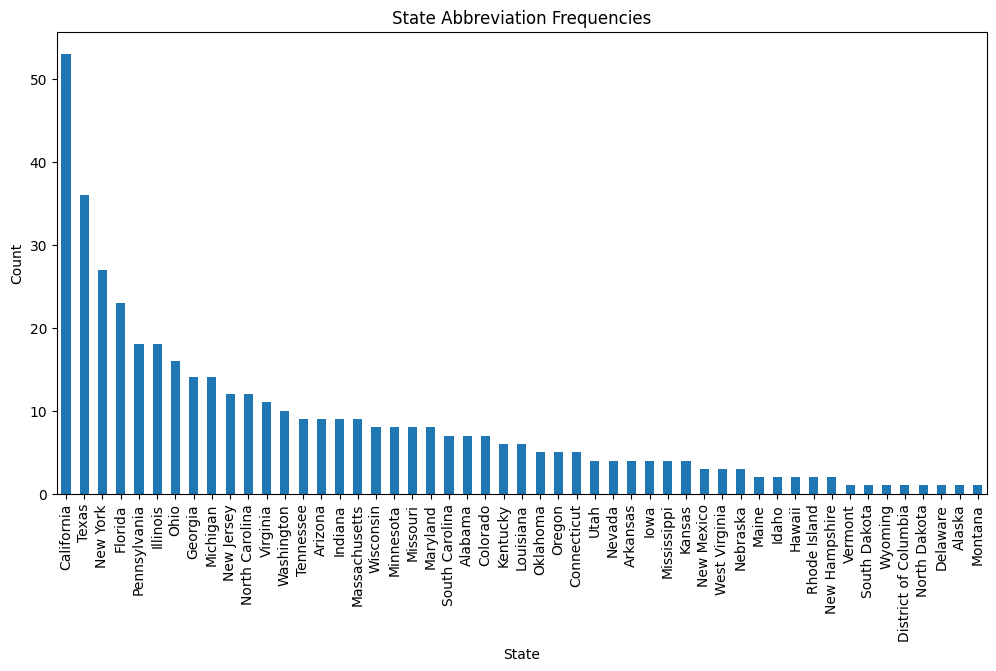

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


merged_df = pd.read_csv('../../data/processed-data/merged.csv') 
merged_standard_df = pd.read_csv('../../data/processed-data/merged_standard.csv') 

state_turnout = merged_df.groupby('state_abbreviation')['voting_rate_estimate'].mean().sort_values()
print("Top 5 states with the highest voting rate:")
print(state_turnout.tail(5))

# Print the bottom 5 states with the lowest voting rate
print("\nBottom 5 states with the lowest voting rate:")
print(state_turnout.head(5))
# Frequency counts for categorical variables

# Bar plot for state frequencies
merged_df['state'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title("State Abbreviation Frequencies")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

### Univariate Distribution

I then plotted the **univariate variables**:  
- **median_household_income**  
- **total_population**  
- **voting_rate_estimate**  

to better understand the **distribution of the data**.  

- **total_population** and **voting_rate_estimate** displayed **normal distributions**.  
- The distribution of **median_household_income** was **skewed to the right**, with the majority of values falling **below the mean**.  


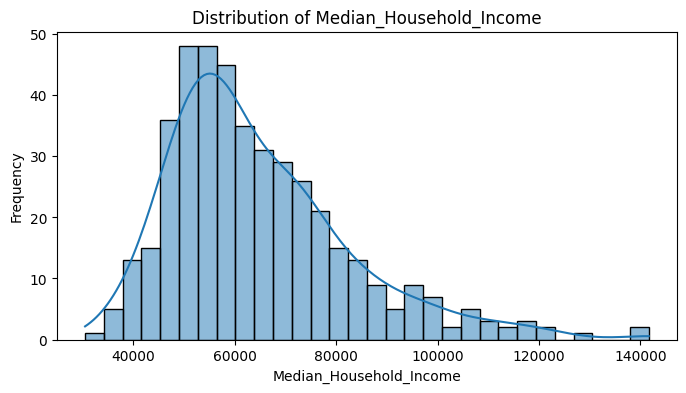

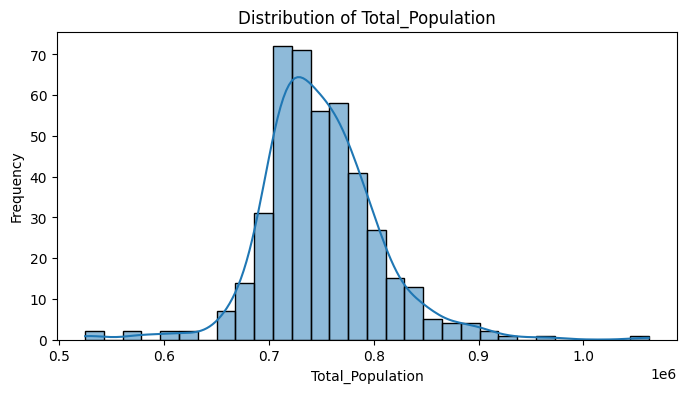

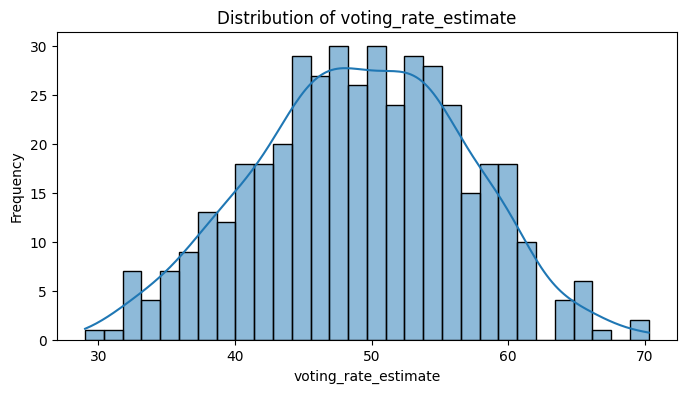

In [2]:
# Summary statistics for numerical variables


# Histograms for selected columns
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['Median_Household_Income', 'Total_Population', 'voting_rate_estimate']:
    plt.figure(figsize=(8, 4))
    sns.histplot(merged_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


 Outlier Removal
To address outliers that may affect the mean and skewness of the data, I evaluated the skewness of every variable, those with over 1 were considered skewed and needed to be Log Normalized.

This showed that the variables “African_American”, “Asian”, “American_Indian_and_Alaskan_Native”, “Native_Hawaiin_and_Pacific_Islander” and “Median_househould_income” had skew values greater than the absolute value of 1, indicating a highly asymmetric and imbalanced distribution of data.
## Skewness Measurement Before Log

In [3]:
import matplotlib.pyplot as plt

# Calculate skewness for all numerical columns
from scipy.stats import skew


# Ensure 'Congressional_District' is treated as a string
merged_df['Congressional_District'] = merged_df['Congressional_District'].astype(str)

# Calculate skewness for all numerical columns and filter values greater than 1
skew_values = {}
for col in merged_df.select_dtypes(include=['float64', 'int64']).columns:
    skew_value = skew(merged_df[col], nan_policy='omit')  # Handle NaN values gracefully
    if abs(skew_value) > 1:  # Filter for skewness greater than 1 in magnitude
        skew_values[col] = skew_value

# Display columns with skewness > 1
print("Columns with skewness > 1:")
for col, skew_value in skew_values.items():
    print(f"{col}: {skew_value}")


Columns with skewness > 1:
African_American: 1.8797342205111223
Asian: 3.1701394736477755
Median_Household_Income: 1.2034986622111112
American_Indian_and_Alaska_Native: 7.498173419926523
Native_Hawaiian_and_Pacific_Islander: 13.340848187737828


This analysis showed that the variables **African_American**, **Asian**, **American_Indian_and_Alaskan_Native**, **Native_Hawaiian_and_Pacific_Islander**, and **Median_household_income** had skew values greater than the absolute value of 1, indicating a **highly asymmetric and imbalanced distribution** of data.


## Skewness Measurement After Log

In [4]:
from scipy.stats import skew
import numpy as np

# Make a copy of the dataframe for log transformation
merged_log_df = merged_df.copy()

# Identify highly skewed columns
highly_skewed_cols = [col for col, skewness in skew_values.items() if abs(skewness) > 1]

# Apply log1p transformation to highly skewed columns
for col in highly_skewed_cols:
    if col in merged_log_df.columns:  # Check if the column exists
        merged_log_df[f'Log_{col}'] = np.log1p(merged_log_df[col])  # log1p handles zeros

# Verify skewness after log transformation
print("\nSkewness after log transformation:")
for col in highly_skewed_cols:
    log_col = f'Log_{col}'  # Construct the name of the log-transformed column
    if log_col in merged_log_df.columns:  # Ensure the column exists
        transformed_skew = skew(merged_log_df[log_col])
        print(f"{log_col} skewness: {transformed_skew}")
    else:
        print(f"{log_col} does not exist in the dataframe.")


# List of original columns to drop
original_cols_to_drop = ['African_American', 'Asian', 'Median_Household_Income', 
                         'American_Indian_and_Alaska_Native', 
                         'Native_Hawaiian_and_Pacific_Islander']

# Drop the original columns
merged_log_df = merged_log_df.drop(columns=original_cols_to_drop)


Skewness after log transformation:
Log_African_American skewness: -0.0037722382003638464
Log_Asian skewness: 0.23046056077109553
Log_Median_Household_Income skewness: 0.4321994689438688
Log_American_Indian_and_Alaska_Native skewness: 0.8066703344257306
Log_Native_Hawaiian_and_Pacific_Islander skewness: -1.1212873986956227


I applied **log-normalization** to these columns on a copy of the original `merged_df`. After checking the skewness again:  
- All values had an absolute value < 1, except for **Native_Hawaiian_and_Pacific_Islander**, which remained slightly over 1.  

I chose **not to reapply log-normalization** to this variable, as the skew was only slightly above 1 and further transformations could compromise **data integrity**.  

The results were stored in a new temporary DataFrame called **`merged_log_df`**, with the original skewed columns removed.  

## Standardizing Log Transformed Data 

I then decided to standardize the columns once again, as the new `merged_log_df` has only been log normalized so far, producing a new data set `merged_log_standard_df`. This data frame will include columns that were logged and standardized. Merged_df, containing the raw data, and `merged_standard_df`, containing standardized data are kept for comparison.


In [5]:
columns_to_standardize = ['Total_Population', 'White',
                          'Veterans', 'Nonveterans', 'Below_Poverty_Level', 'High_School_Graduate', 
                          'Bachelors_Degree_or_Higher', 'Households_with_Computers', 
                          'Households_with_Internet', 'Median_Age', 
                          'Log_African_American', 'Log_Asian', 
                          'Log_Median_Household_Income', 'Log_American_Indian_and_Alaska_Native', 
                          'Log_Native_Hawaiian_and_Pacific_Islander', 'votes_cast', 'citizen_voting_age_population_estimate',  'voting_rate_estimate']


from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize the selected columns
merged_standard_log_df = merged_log_df.copy() 
merged_standard_log_df[columns_to_standardize] = scaler.fit_transform(merged_standard_log_df[columns_to_standardize])

print(merged_standard_log_df.describe().T)



                                          count          mean       std  \
Total_Population                          431.0  4.698484e-16  1.001162   
White                                     431.0  1.318873e-16  1.001162   
Veterans                                  431.0  1.648591e-17  1.001162   
Nonveterans                               431.0  1.191107e-15  1.001162   
Below_Poverty_Level                       431.0  5.357921e-17  1.001162   
High_School_Graduate                      431.0 -3.544471e-16  1.001162   
Bachelors_Degree_or_Higher                431.0 -1.895880e-16  1.001162   
Households_with_Computers                 431.0  4.780914e-16  1.001162   
Households_with_Internet                  431.0  2.143168e-16  1.001162   
Median_Age                                431.0  2.514101e-16  1.001162   
votes_cast                                431.0 -3.626900e-16  1.001162   
citizen_voting_age_population_estimate    431.0 -7.377445e-16  1.001162   
voting_rate_estimate     

The below plot shows the difference in distribution of the logged variables. It is very prominent that the logged values are much more normally distributed than the skewed data.

# Distribution of Log Transformed Data 

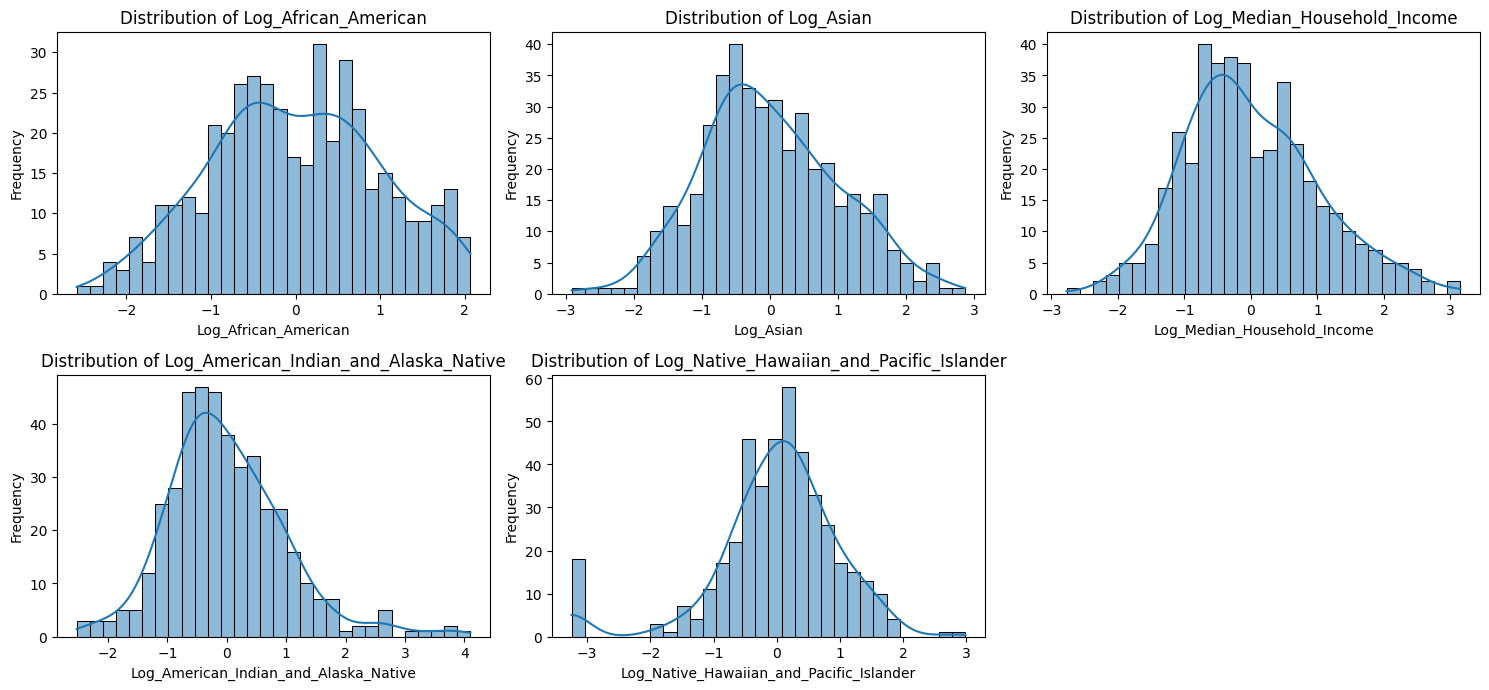

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select log-transformed columns
log_columns = [col for col in merged_standard_log_df.columns if "Log_" in col]

# Plot distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(log_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(merged_standard_log_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Distribution of Non-Log Transformed Data 

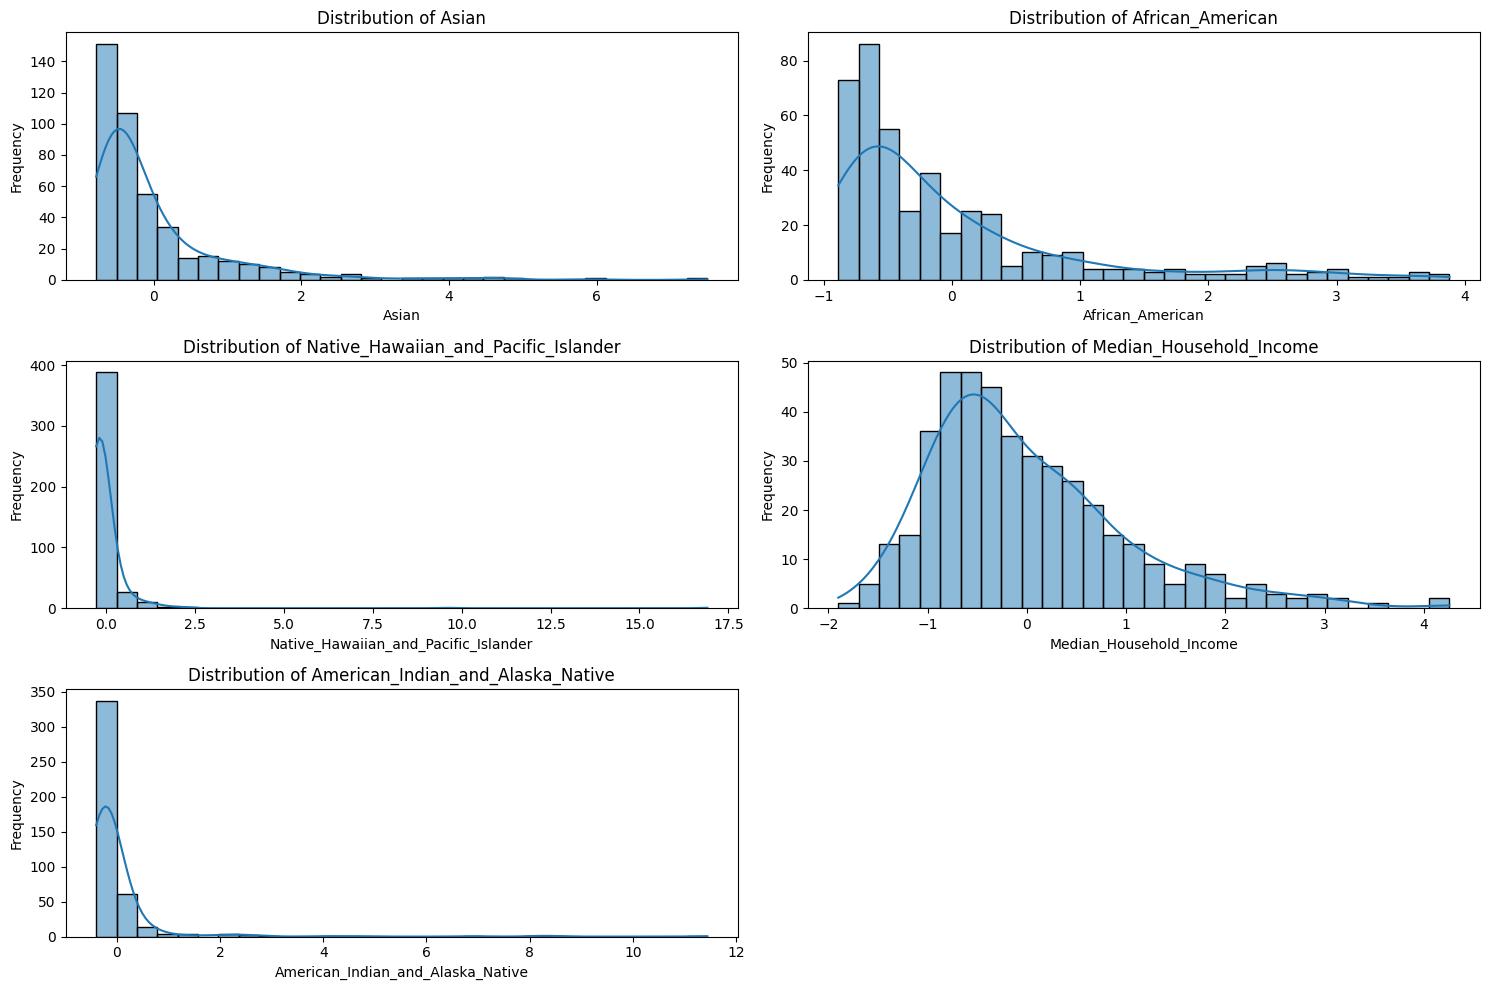

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the columns to plot
columns_to_plot = [
    "Asian", 
    "African_American", 
    "Native_Hawaiian_and_Pacific_Islander", 
    "Median_Household_Income", 
    "American_Indian_and_Alaska_Native"
]

# Plot distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)  # Adjust the grid for the number of plots
    sns.histplot(merged_standard_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Correlation 

To evaluate if utilizing the log transformed and standardized data set produced any difference, a **correlation heat map** was created.

## Correlation Heatmap of Log-Transformed Data


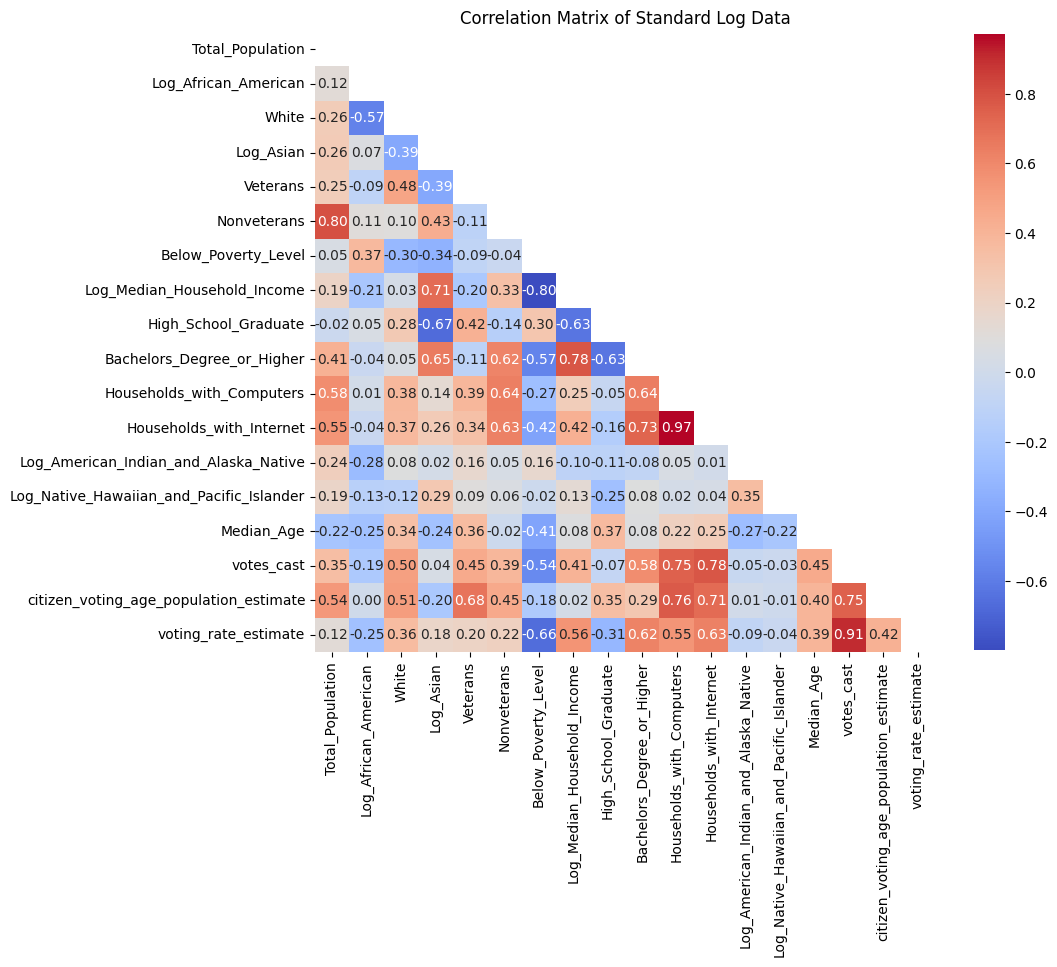

In [8]:
# Create a mapping of original to log-transformed column names
original_columns = merged_standard_df.columns
log_columns = ["Log_" + col if "Log_" + col in merged_standard_log_df.columns else col for col in original_columns]

# Reorder the log-transformed dataframe to match the order of original dataframe
merged_standard_log_df = merged_standard_log_df[log_columns]

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
numeric_cols = merged_standard_log_df.select_dtypes(include=['float64', 'int64'])
corr = numeric_cols.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Heatmap visualization
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Standard Log Data")
plt.show()

# Correlation Heatmap off Non Log-Transformed Data

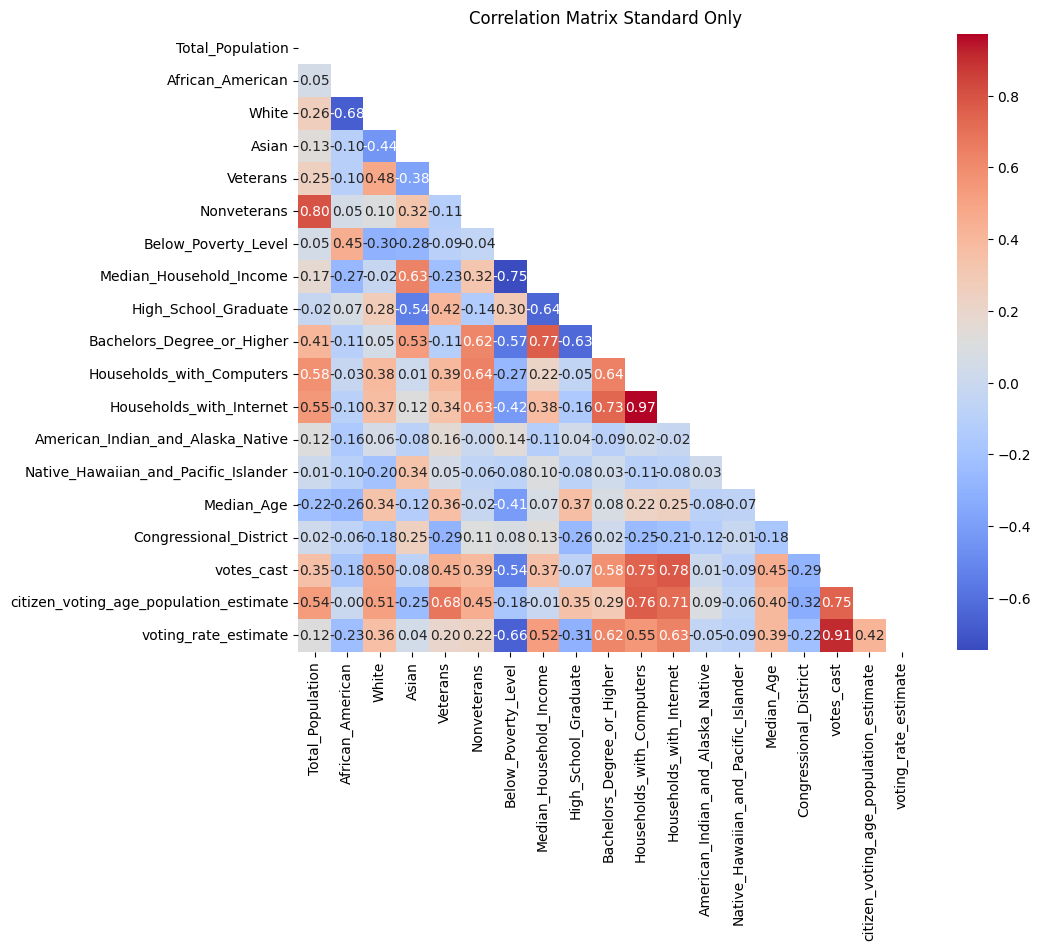

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
numeric_cols = merged_standard_df.select_dtypes(include=['float64', 'int64'])
corr = numeric_cols.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Heatmap visualization
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix Standard Only ")
plt.show()

## Log Transformed Effect Analysis

In [10]:
import pandas as pd

# Data for the table
data = {
    "Variable": [
        "African American",
        "Asian",
        "Median Income",
        "American Indian and Alaska Native",
        "Native Hawaiian and Pacific Islander"
    ],
    "Standard Correlation": [
        -0.22, 
        0.05, 
        0.53, 
        -0.09, 
        0.09
    ],
    "Log Correlation": [
        -0.24, 
        0.19, 
        0.56, 
        -0.12, 
        -0.04
    ]
}

# Create the DataFrame
comparison_df = pd.DataFrame(data)
print(comparison_df)

                               Variable  Standard Correlation  Log Correlation
0                      African American                 -0.22            -0.24
1                                 Asian                  0.05             0.19
2                         Median Income                  0.53             0.56
3     American Indian and Alaska Native                 -0.09            -0.12
4  Native Hawaiian and Pacific Islander                  0.09            -0.04


The results showed that the variables that were logged experienced a **change in correlation** with `voting_rate_estimate` after the transformation:

- **African American**:  
  - Standard: **-0.22** → Log-transformed: **-0.24**  

- **Asian**:  
  - Standard: **0.05** → Log-transformed: **0.19**  

- **Median Income**:  
  - Standard: **0.53** → Log-transformed: **0.56**  

- **American Indian and Alaska Native**:  
  - Standard: **-0.05** → Log-transformed: **-0.09**  

- **Native Hawaiian and Pacific Islander**:  
  - Standard: **0.09** → Log-transformed: **-0.04**  

Other variables not affected by the log transformation retained the **same correlation scores**.

The **biggest difference** and surprise was for **Asian**, where the correlation increased by **0.14**. This shift could uncover **new insights previously unseen** and highlights the importance of applying **log transformation** to the dataset.  


## Voting Rate Estimates Correlation

In [11]:
voting_corr = corr['voting_rate_estimate']

# Convert to DataFrame for better readability
voting_corr_df = voting_corr.reset_index()
voting_corr_df.columns = ['Feature', 'Correlation with Voting Rate']

# Sort by correlation values
voting_corr_df = voting_corr_df.sort_values(by='Correlation with Voting Rate', ascending=False)

# Print the DataFrame
print(voting_corr_df)


                                   Feature  Correlation with Voting Rate
18                    voting_rate_estimate                      1.000000
16                              votes_cast                      0.909693
11                Households_with_Internet                      0.631127
9               Bachelors_Degree_or_Higher                      0.622064
10               Households_with_Computers                      0.549691
7                  Median_Household_Income                      0.523973
17  citizen_voting_age_population_estimate                      0.417818
14                              Median_Age                      0.392134
2                                    White                      0.358125
5                              Nonveterans                      0.219181
4                                 Veterans                      0.197612
0                         Total_Population                      0.117178
3                                    Asian         

## Correlation Analysis

In analyzing the Log Transformed heatmap, we found that Voting Rate had the highest correlation with Households_with_internet with 0.63 Bachelors_Degree_or Higher, with 0.62. Following, was Log Median Household Income with 0.56, and Households_with_Computers with 0.55. 

Below Poverty Level had the most negative correlation with -0.66, followed by High_school Graduate with -0.31 and Log_African_American, with -0.25. 

Some other interesting metrics were white with 0.26 and Nonveterans having a higher correlation (0.22) than Veterans (0.2).

# Bi-Variate Distribution

Further visualizations revealed patterns of correlation between features I deemed important, including:  
- Median_Household_Income  
- African_American  
- Asian  
- Poverty_Rate  
- White  
- Veterans  
- High_School_Graduate  
- Bachelors_Degree_or_Higher  
- Median_Age  


## Plotting Log-Transformed Values

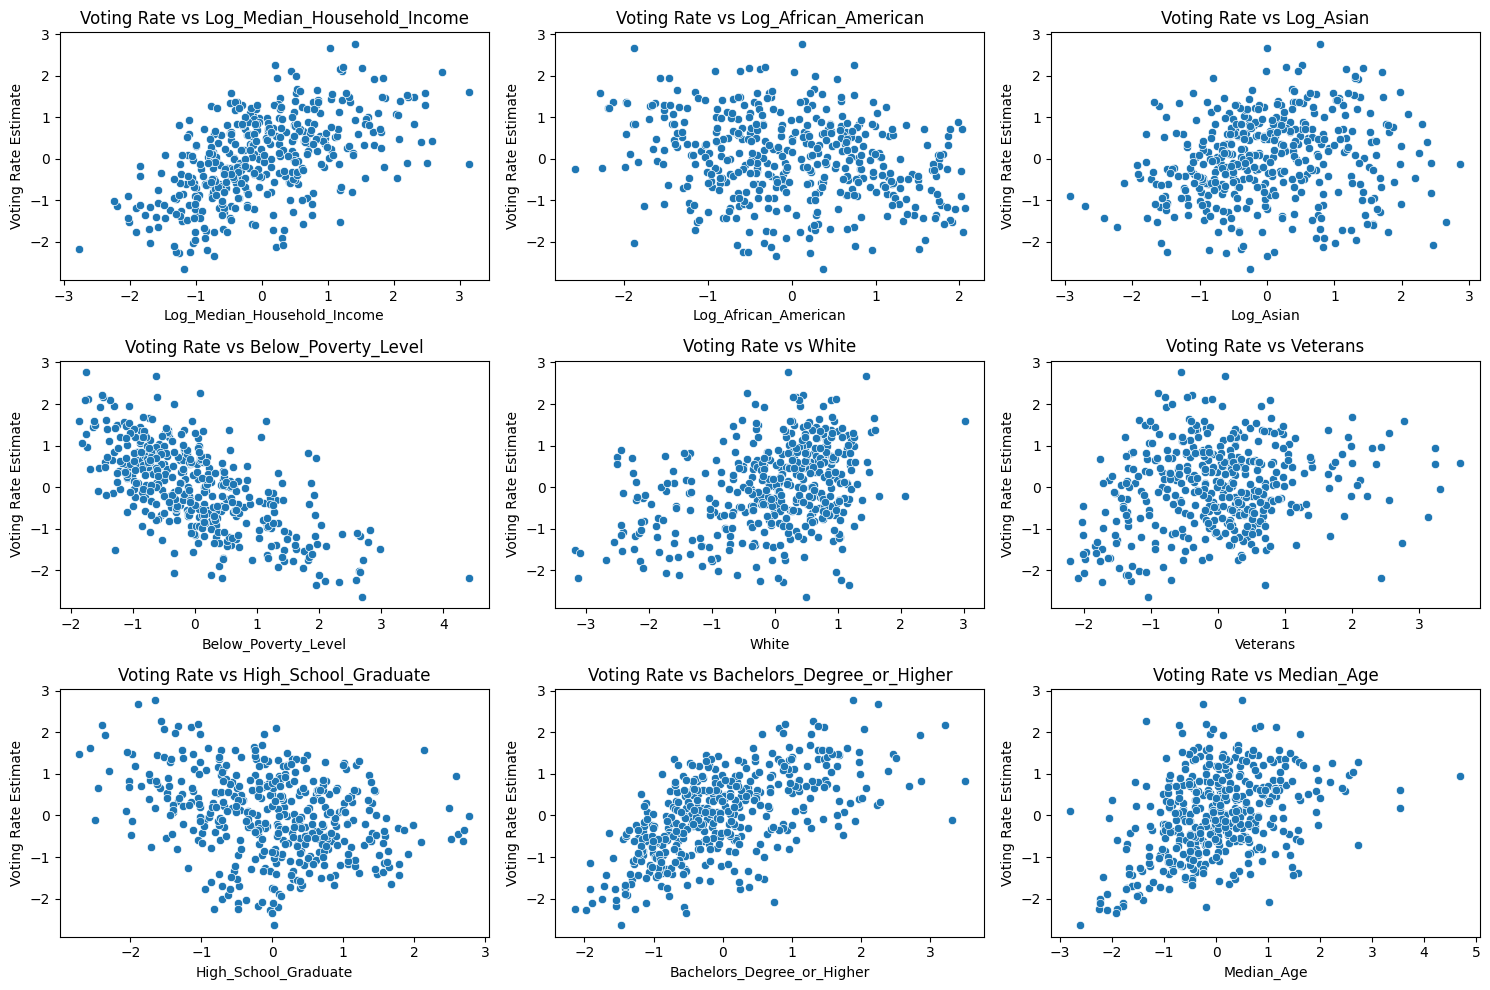

In [12]:
# Scatterplot of voting_rate_estimate against key features
important_features = ['Log_Median_Household_Income', 'Log_African_American', 'Log_Asian', 'Below_Poverty_Level', 'White', 'Veterans', 'High_School_Graduate', 'Bachelors_Degree_or_Higher', 'Median_Age']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=merged_standard_log_df, x=feature, y='voting_rate_estimate')
    plt.title(f"Voting Rate vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Voting Rate Estimate")
plt.tight_layout()
plt.show()

This showcased very interesting outcomes:  
- **Positive correlations** between voting rates and:  
  - Median Household Income  
  - White  
  - Asian  
  - Bachelors Degree or Higher  
  - Median Age  

- **Negative correlations** between voting rates and:  
  - Poverty Rate  
  - High School Graduate

- A **slightly negative correlation** was observed between voting rates and African American.

## Plotting Raw Values

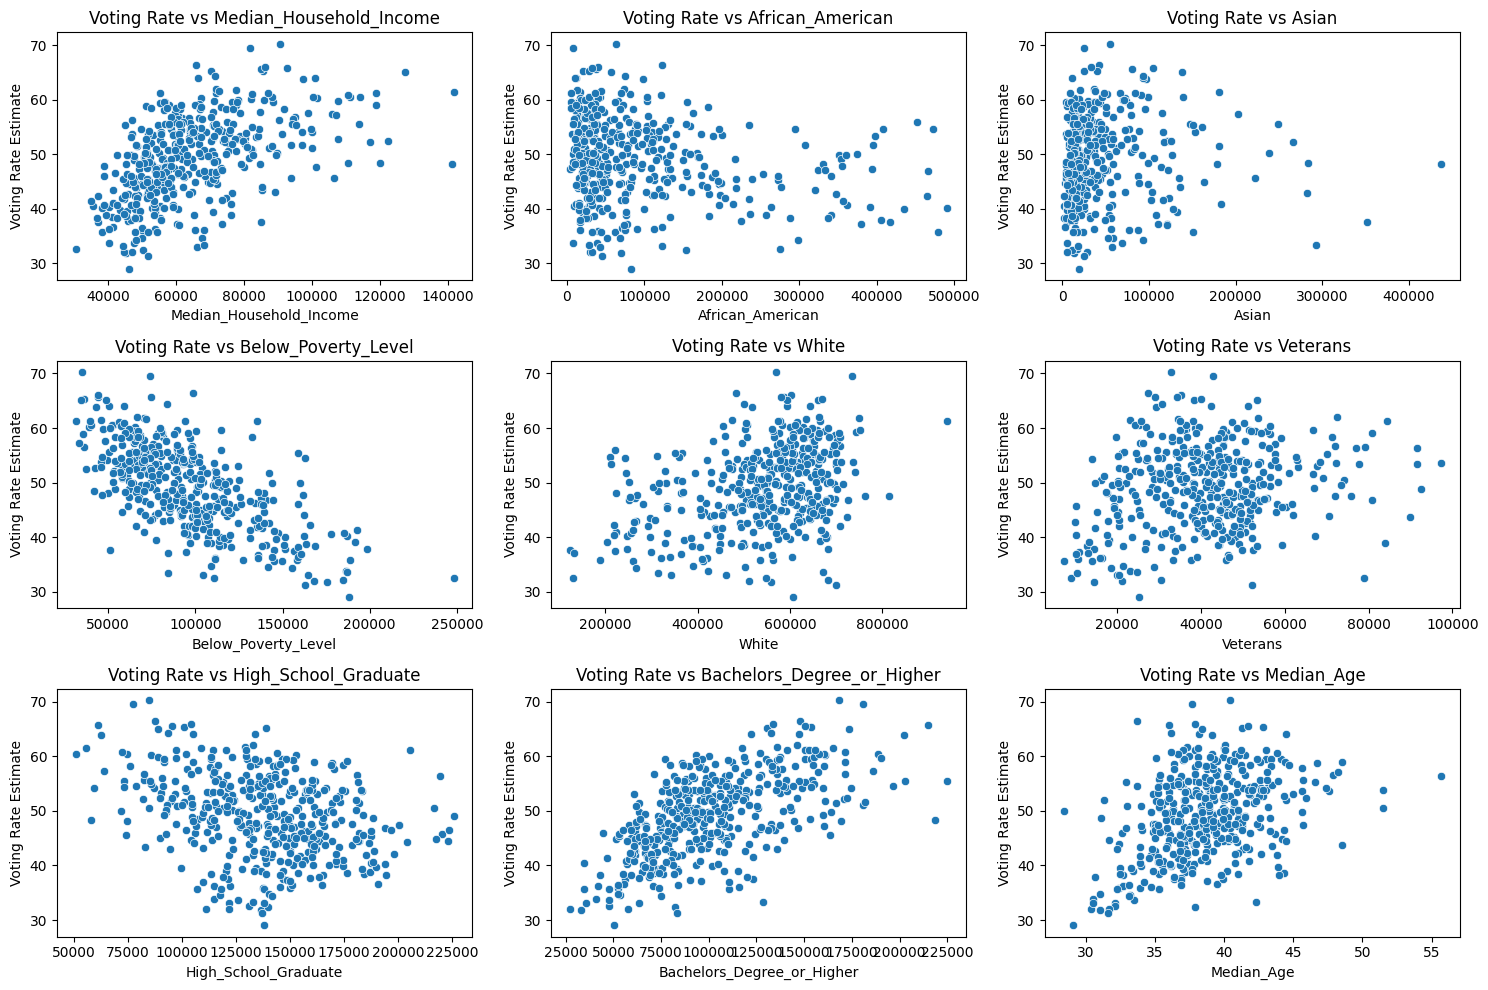

In [13]:
# Scatterplot of voting_rate_estimate against key features
features = ['Median_Household_Income', 'African_American', 'Asian', 'Below_Poverty_Level', 'White', 'Veterans', 'High_School_Graduate', 'Bachelors_Degree_or_Higher', 'Median_Age']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=merged_df, x=feature, y='voting_rate_estimate')
    plt.title(f"Voting Rate vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Voting Rate Estimate")
plt.tight_layout()
plt.show()


When comparing the log-transformed data to the raw data, the both showed patterns where:  
- Median Age, Bachelors Degree, Median Household Income, and White showed **positive correlations**.  
- Poverty Rate maintained a **negative correlation**.  

Due to the skewed data in the Raw Data however, analyzing patterns for **Asian** and **African American** becomes very difficult. This highlights the importance of **log transformation**, as it adjusts the data into a more understandable and explainable form.  

## Comparison of Raw vs Log-Transformed Data Statistics

In [14]:
log_transformed_columns = ['Log_African_American', 'Log_Asian', 'Log_Median_Household_Income', 
                           'Log_American_Indian_and_Alaska_Native', 'Log_Native_Hawaiian_and_Pacific_Islander']

raw_columns = ['African_American', 'Asian', 'Median_Household_Income', 
               'American_Indian_and_Alaska_Native', 'Native_Hawaiian_and_Pacific_Islander']


def calculate_stats(df, columns):
    stats = df[columns].agg(['mean', 'std', 'skew', 'kurtosis']).T
    stats['min'] = df[columns].min()
    stats['max'] = df[columns].max()
    return stats


raw_stats = calculate_stats(merged_df, raw_columns)
log_stats = calculate_stats(merged_standard_log_df, log_transformed_columns)

# Display statistics
print("Raw Data Statistics:")
print(raw_stats)
print("\nLog-Transformed Data Statistics:")
print(log_stats)


Raw Data Statistics:
                                              mean            std       skew  \
African_American                      94183.689095  102405.485798   1.886305   
Asian                                 42399.661253   52777.917382   3.181222   
Median_Household_Income               64795.770302   18072.616613   1.207706   
American_Indian_and_Alaska_Native      6338.090487   15279.267538   7.524386   
Native_Hawaiian_and_Pacific_Islander   1448.104408    5381.575914  13.387485   

                                        kurtosis    min     max  
African_American                        3.165012   3667  491080  
Asian                                  13.842183   1403  437632  
Median_Household_Income                 1.817438  30483  141661  
American_Indian_and_Alaska_Native      66.960823    265  180970  
Native_Hawaiian_and_Pacific_Islander  208.339729      0   92334  

Log-Transformed Data Statistics:
                                                  mean       std    

# Voting Rate by State

A box and whisker plot is shown to showcase the differences in voting rates between states. This shows how voting rates differ between states, with Minnesota having the highest with 62.7% and Hawaii with the lowest at 39.22%.

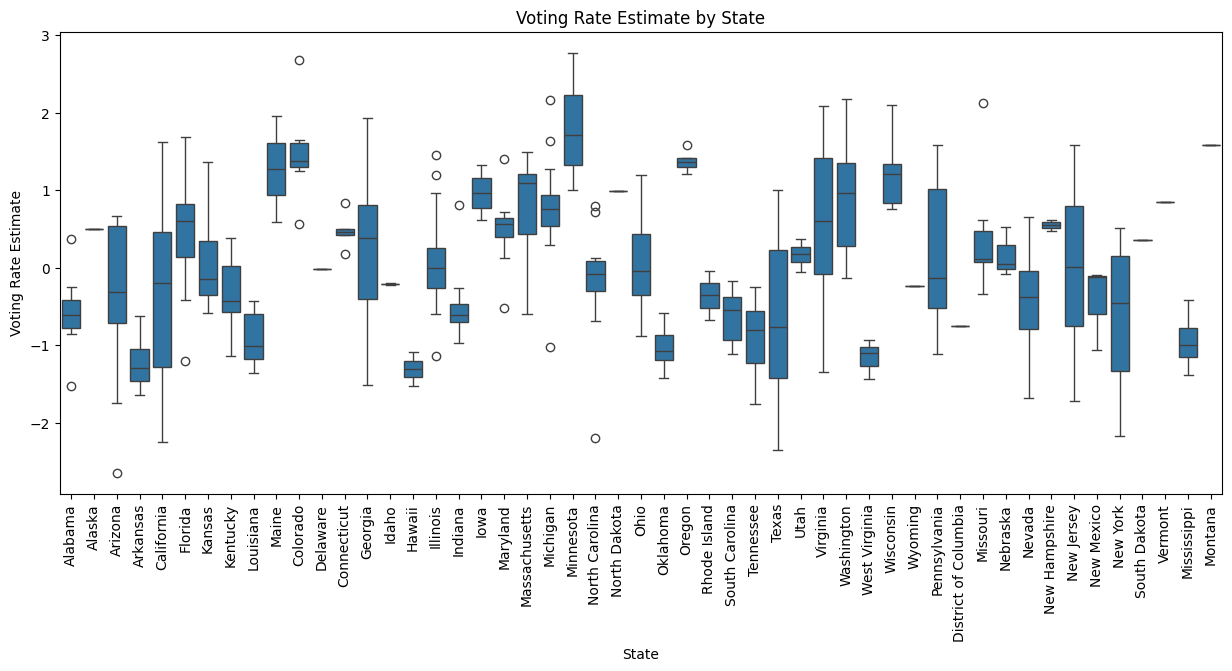

In [15]:
# Boxplot of voting rate by state
plt.figure(figsize=(15, 6))
sns.boxplot(data=merged_standard_log_df, x='state', y='voting_rate_estimate')
plt.xticks(rotation=90)
plt.title("Voting Rate Estimate by State")
plt.xlabel("State")
plt.ylabel("Voting Rate Estimate")
plt.show()

## Distribution of Voting Rate Pairplot

A pairwise plot showcasing scatterplots between the important features is shown, with the ability to not only check correlation between features and voting rate, but all features amongst each other. 
- For example, poverty rate and bachelors degree or higher have a negative correlation, while bachelors degree of higher and median income have a positive correlation.

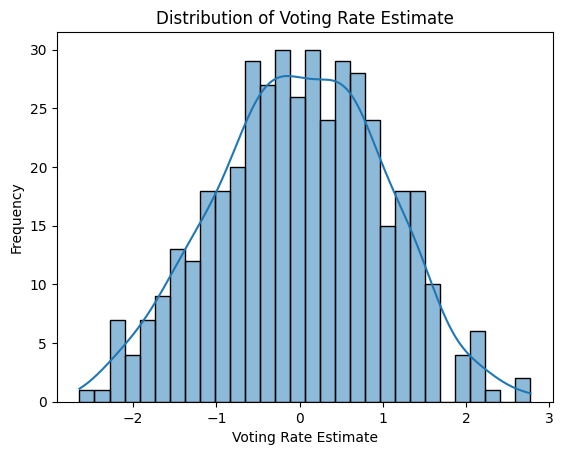

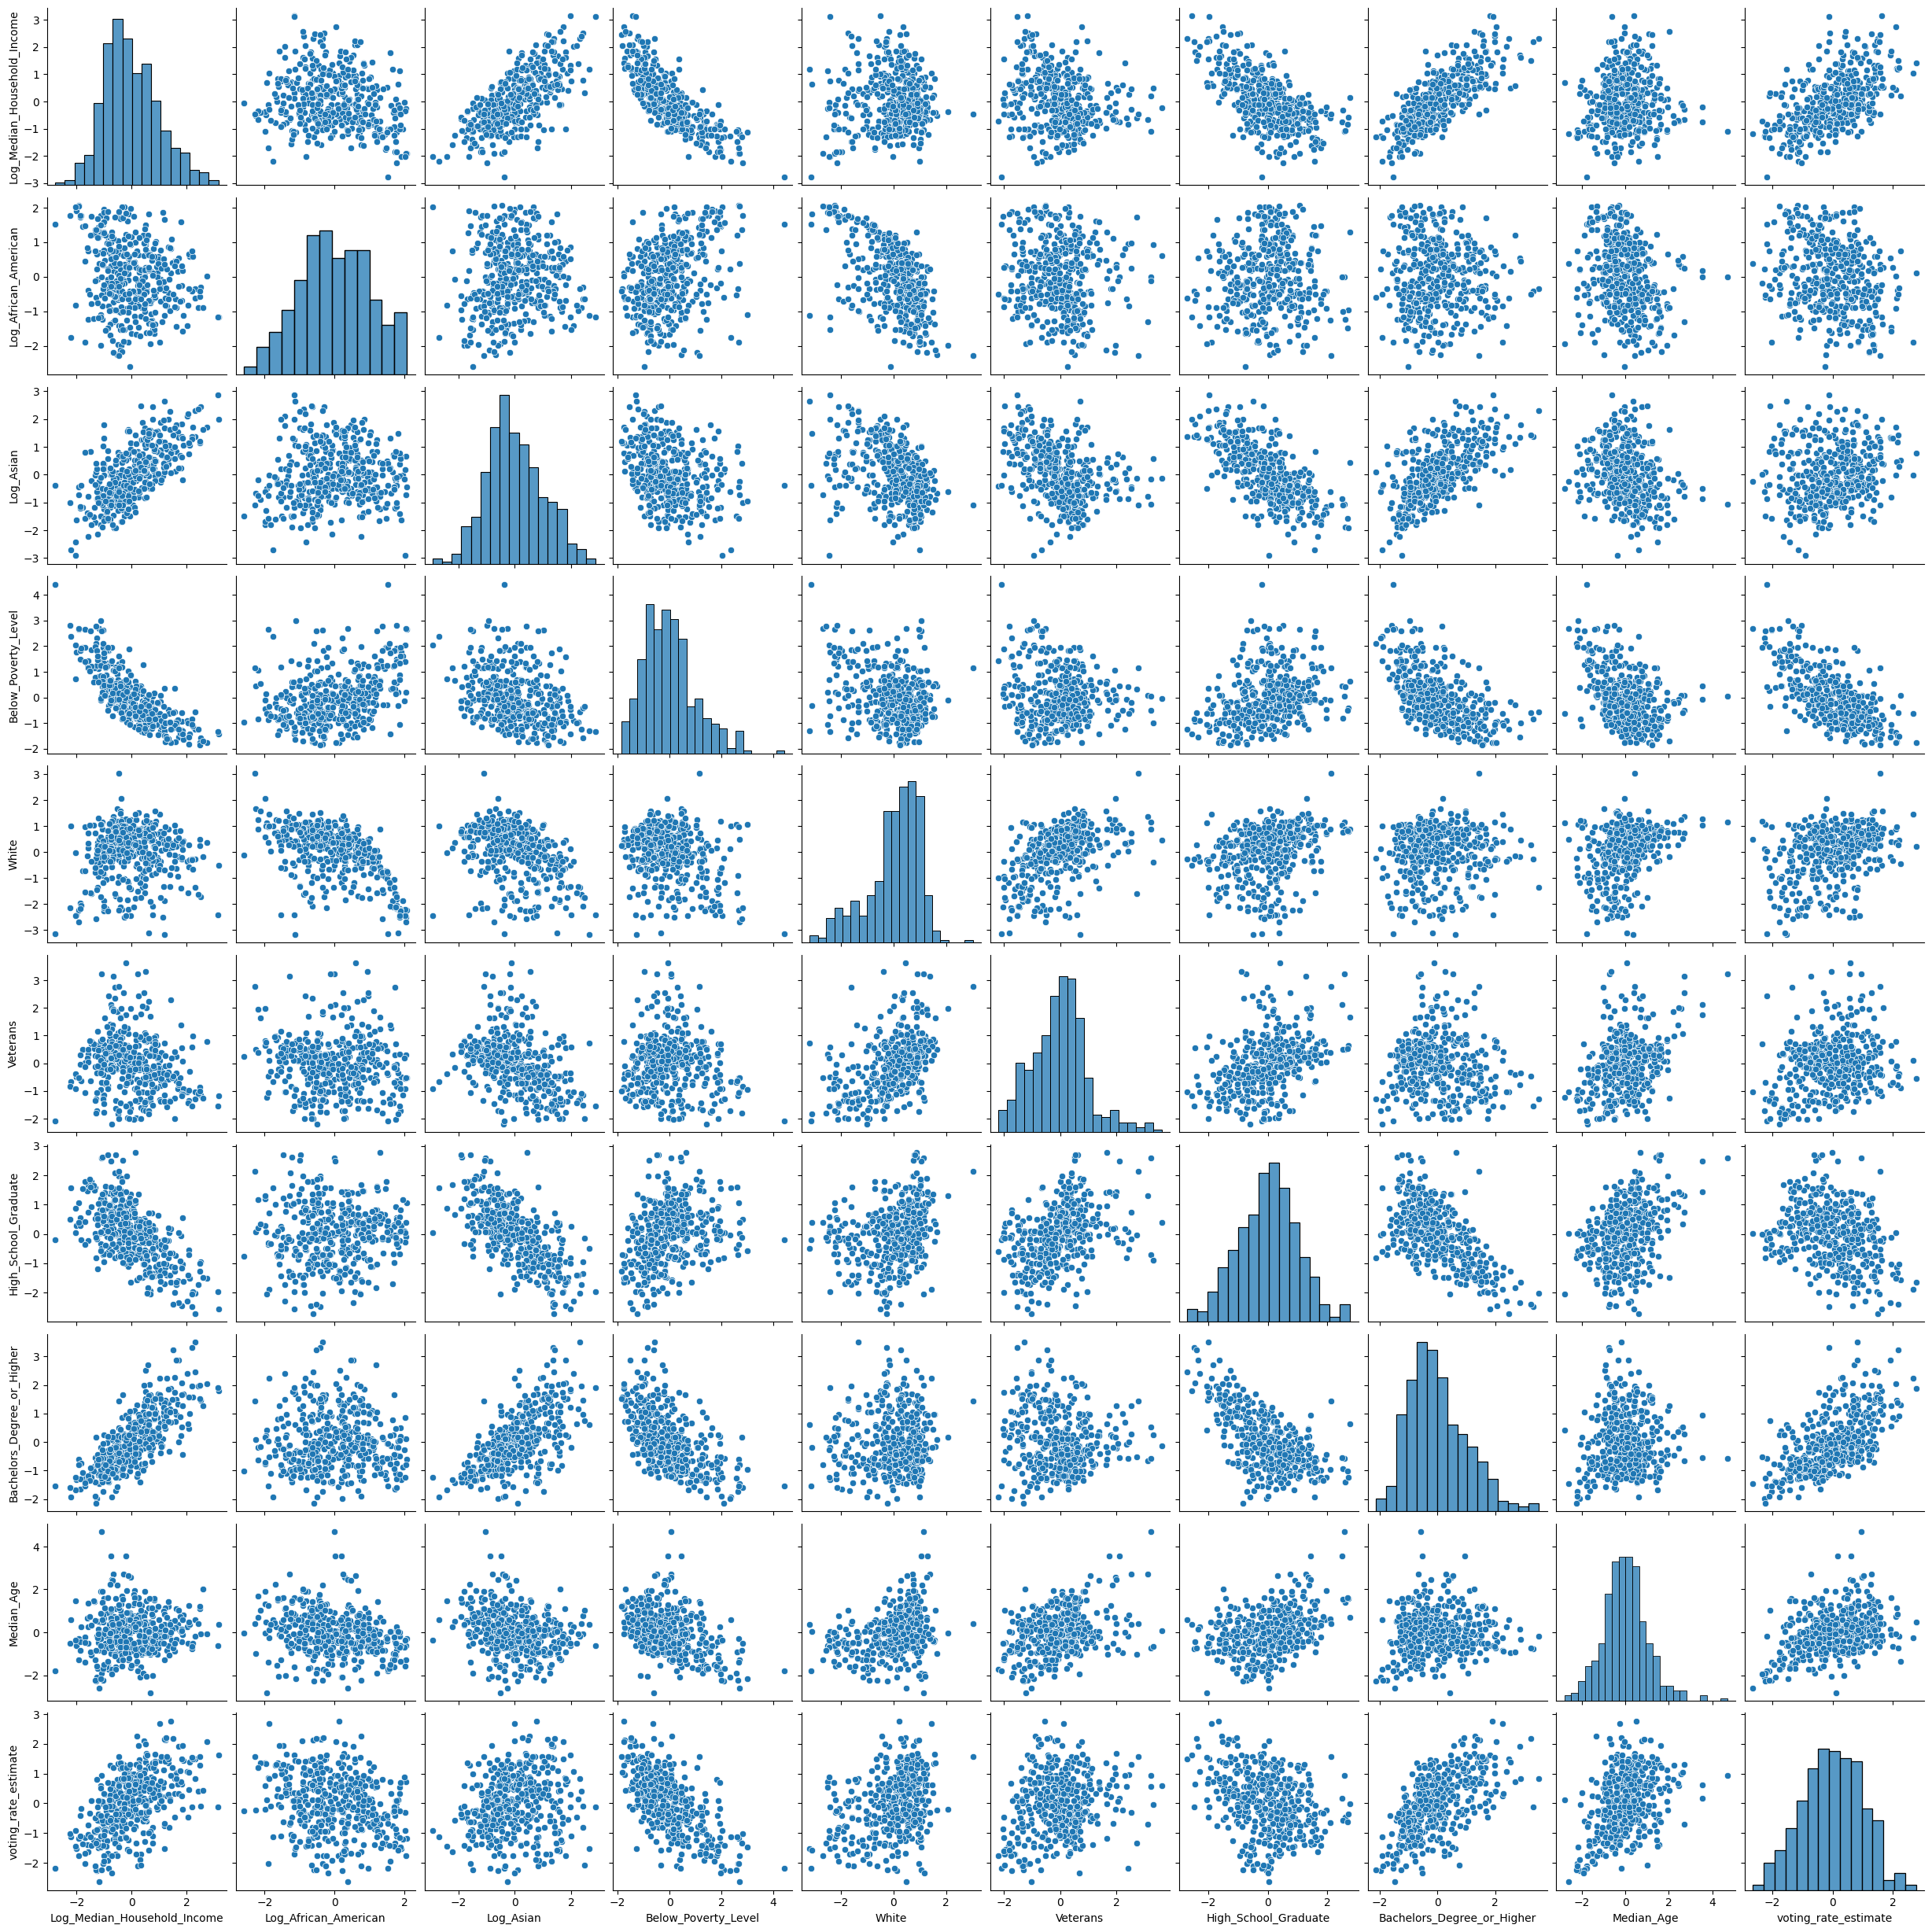

In [16]:
# Distribution of voting_rate_estimate
sns.histplot(merged_standard_log_df['voting_rate_estimate'], kde=True, bins=30)
plt.title("Distribution of Voting Rate Estimate")
plt.xlabel("Voting Rate Estimate")
plt.ylabel("Frequency")
plt.show()

# Relationship with features
sns.pairplot(data=merged_standard_log_df, vars=important_features + ['voting_rate_estimate'])
plt.show()


#  Statistical Testing

Statistical testing was utilized to answer questions regarding the data and relationships between variables. We utilize an ANOVA test and T Test to compare and quantify differences between voting rate and states

**Null Hypothesis**: There are no significant statistical differences between states.
**Alternative Hypothesis**: There is a significant statistical difference between states.
An Anova test is done to evaluate if there is any differences in voting rate between states. 

## Anova Test 

In [17]:
# do voting rates differ for states 
from scipy.stats import f_oneway

groups = [merged_standard_log_df[merged_standard_log_df['state_abbreviation'] == state]['voting_rate_estimate'] 
          for state in merged_standard_log_df['state_abbreviation'].unique()]

f_stat, p_value = f_oneway(*groups)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

F-Statistic: 5.939407497543833, P-Value: 2.4710973577299353e-25


The extremely low P value indicates that there is statistically significant differences in voting rate between states.

## T-Test: California vs Texas

The two states with the highest amount of Districts, California and Texas are compared against each other 

In [18]:
from scipy.stats import ttest_ind
state_1 = merged_standard_log_df[merged_standard_log_df['state_abbreviation'] == 'CA']['voting_rate_estimate']
state_2 = merged_standard_log_df[merged_standard_log_df['state_abbreviation'] == 'TX']['voting_rate_estimate']

t_stat, p_value = ttest_ind(state_1, state_2)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 1.663421030911609, P-Value: 0.09982659171288376


The p-value is greater than 0.05, so we fail to reject the null hypothesis. This indicates the difference in voting rates between California and Texas is not statistically significant at the 95% confidence level.

## T-Test: Massachusetts vs Rhode Island

Two states, Massachussets and Rhode Island are compared. Both states are similar in size and in the North East

In [19]:
from scipy.stats import ttest_ind


state_1 = merged_standard_log_df[merged_standard_log_df['state_abbreviation'] == 'MA']['voting_rate_estimate']
state_2 = merged_standard_log_df[merged_standard_log_df['state_abbreviation'] == 'RI']['voting_rate_estimate']

t_stat, p_value = ttest_ind(state_1, state_2)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 1.9987057273754905, P-Value: 0.07671272608947101


The p-value is greater than 0.05, so we fail to reject the null hypothesis. This indicates the difference in voting rates between Massachussets and Rhode Island is not statistically significant at the 95% confidence level.

## T-Test: Florida vs Oregon

Florida and Oregon are compared. These states have drastically different population sizes, geography, and voting culture.

In [20]:
from scipy.stats import ttest_ind


state_1 = merged_standard_log_df[merged_standard_log_df['state_abbreviation'] == 'FL']['voting_rate_estimate']
state_2 = merged_standard_log_df[merged_standard_log_df['state_abbreviation'] == 'OR']['voting_rate_estimate']

t_stat, p_value = ttest_ind(state_1, state_2)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -3.1624093707880396, P-Value: 0.003953916864173521


The  P value below 0.05 indicates that there is statistically significant differences in voting rate between these two  states.


# Conclusion 

## Distribution Analysis  
- **Skewness in Data**: Variables such as **African_American**, **Asian**, **Median_Household_Income**, and 2 other features showed high skewness.  
- **Log Transformation Impact**: After log transformation, the skewed variables became more normally distributed, improving interpretability and analysis.  
   - For example, the correlation for **Asian** improved from **0.05** (non-logged) to **0.19** (logged), revealing previously unseen patterns.  

## Correlation Analysis  
- Voting Rate had the **strongest positive correlations** with:  
   - Households_with_Internet (**0.63**)  
   - `Bachelors_Degree_or_Higher (**0.62**)  
   - Log Median Household Income (**0.56**)  
- The **strongest negative correlations** were observed with:  
   - Below_Poverty_Level (**-0.66**)  
   - High_School_Graduate (**-0.31**)  
   - Log_African_American (**-0.25**)  

## State-Wise Voting Rate  
- States such as **Minnesota** had the **highest average voting rates** (**62.7%**), while **Hawaii** had the **lowest** (**39.22%**).  
- Significant differences in voting rates were confirmed across states through the **ANOVA test**.  

## Statistical Testing  
- **California vs Texas**: No statistically significant difference in voting rates.  
- **Massachusetts vs Rhode Island**: No statistically significant difference in voting rates.  
- **Florida vs Oregon**: Statistically significant differences were observed, highlighting the impact of **geography** and **culture** on voter turnout.  


---

# Next Steps  

## Policy Recommendations  
- Focus on **socioeconomic factors** like poverty reduction and **education access** to improve voter turnout.  
- Increase **internet access**, as these show strong correlations with higher voting rates.  

